## Implement Ensemble Agent

Ensemble agent that controlls all the sub price agents of different models

In [1]:
# imports

import os
import re
import math
import json
from tqdm import tqdm
import logging
import random
from dotenv import load_dotenv
from huggingface_hub import login
import matplotlib.pyplot as plt
import numpy as np
import pickle
from openai import OpenAI
from sentence_transformers import SentenceTransformer
from datasets import load_dataset
import chromadb
import modal

### Internal Classes
from testing import Tester
from agents.ensemble_agent import EnsembleAgent

/Volumes/VTG/Dev/C_5/Projects/week8/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# environment

load_dotenv(override=True)
os.environ['OPENAI_API_KEY'] = os.getenv('OPENAI_API_KEY')
os.environ['HF_TOKEN'] = os.getenv('HF_TOKEN')

In [3]:
# Log in to HuggingFace

hf_token = os.environ['HF_TOKEN']
login(hf_token, add_to_git_credential=True)

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [4]:
with open("test.pkl", "rb") as f: 
    test = pickle.load(f)

In [5]:
DB = "products_vectorstore/"

client = chromadb.PersistentClient(path=DB)
collection = client.get_or_create_collection("product")

In [6]:
def description(item):
    text = item.prompt.replace("How much does this cost to the nearest dollar?\n\n", "")
    return text.split("\n\nPrice is $")[0]

In [7]:
logging.basicConfig(level=logging.INFO)

In [8]:
ensemble_agent = EnsembleAgent(collection)

INFO:root:[Ensemble Agent] Initializing Ensemble Agent...
INFO:root:[Specialist Agent] Specialist Agent is initializing -- connecting to Modal...
INFO:root:[Specialist Agent] Specialist Agent is ready!
INFO:root:[Frontier Agent] Initializing Frontier Agent...
INFO:root:[Frontier Agent] Frontier Agent is setting up with OpenAI
INFO:sentence_transformers.SentenceTransformer:Use pytorch device_name: mps
INFO:sentence_transformers.SentenceTransformer:Load pretrained SentenceTransformer: sentence-transformers/all-MiniLM-L6-v2
INFO:root:[Frontier Agent] Frontier Agent is ready!
INFO:root:[Neural Network Agent] Neural Network Agent is initializing...
INFO:root:[Neural Network Agent] Neural Network Agent is ready!
INFO:root:[Ensemble Agent] Ensemble Agent is ready!


INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, frontier and neural network agents...
INFO:root:[Specialist Agent] Specialist Agent is calling remote fine-tuned model...
INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.88it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $169.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Ag

1: Guess: $170.51 Truth: $249.99 Error: $79.48 SLE: 0.14 Item: Medicom Batman Hush Black Suit Version B...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.69it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $9.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $42.62
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $9.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, 

2: Guess: $9.09 Truth: $3.99 Error: $5.10 SLE: 0.50 Item: ALTKOL S Hooks for Hanging, 15-Pack S Sh...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $89.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.55it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $39.67
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $124.01
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with special

3: Guess: $124.01 Truth: $109.99 Error: $14.02 SLE: 0.01 Item: Nady RSM-5 Ribbon Microphone - Unique co...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.87it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $9.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $60.25
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $9.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, 

4: Guess: $9.09 Truth: $6.97 Error: $2.12 SLE: 0.06 Item: PANDAFLY Acrylic Paint Pens for Rock Pai...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.35it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $150.05
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $135.11
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

5: Guess: $135.11 Truth: $164.99 Error: $29.88 SLE: 0.04 Item: Mistel MD600RGB v3 60% Split Mechanical ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.27it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $163.42
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $52.29
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

6: Guess: $52.29 Truth: $204.00 Error: $151.71 SLE: 1.82 Item: SWITCH by Design Studio, Big Giant Plaid...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.18it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $173.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $154.72
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

7: Guess: $154.72 Truth: $168.00 Error: $13.28 SLE: 0.01 Item: Polk Audio - A Pair of DB652 6.5" Coaxia...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.79it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $14.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $52.68
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $26.69
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

8: Guess: $26.69 Truth: $15.00 Error: $11.69 SLE: 0.30 Item: 6 Pack of 2 Inch Acoustic Foam Panels- P...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $500.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.31it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $399.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $47.17
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $409.10
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

9: Guess: $409.10 Truth: $378.32 Error: $30.78 SLE: 0.01 Item: Guild Guitars Jumbo Jr Mahogany Acoustic...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $110.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.34it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $99.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $148.24
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $101.76
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

10: Guess: $101.76 Truth: $122.55 Error: $20.79 SLE: 0.03 Item: SIIG 10 Port 150W USB Charging Station w...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.39it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $279.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $361.03
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $293.20
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

11: Guess: $293.20 Truth: $219.99 Error: $73.21 SLE: 0.08 Item: HIK-Tech US 4K(8MP) Outdoor ColorVu Bull...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.38it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $262.38
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $155.42
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $238.97
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

12: Guess: $238.97 Truth: $291.30 Error: $52.33 SLE: 0.04 Item: IsoStation IS-5AC-US 5GHz 802.11ac CPE 1...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.56it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $69.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $30.44
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $58.42
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

13: Guess: $58.42 Truth: $26.00 Error: $32.42 SLE: 0.62 Item: Hot Wheels Volcano Escape Playset


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.56it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $19.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $122.27
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $30.16
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

14: Guess: $30.16 Truth: $17.00 Error: $13.16 SLE: 0.30 Item: Beadaholique Hot-Fix Applicator Wand Too...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.49it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $31.62
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $28.49
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

15: Guess: $28.49 Truth: $29.99 Error: $1.50 SLE: 0.00 Item: Beyblade Slingshock Turbo Spryzen S4


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.66it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $24.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $35.63
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $24.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

16: Guess: $24.99 Truth: $28.75 Error: $3.76 SLE: 0.02 Item: Breaking Games Mobscenity The Totally Bl...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.18it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $49.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $109.73
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $55.38
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

17: Guess: $55.38 Truth: $33.19 Error: $22.19 SLE: 0.25 Item: Resistance Tester Resistance Capacitance...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.08it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $34.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $54.25
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $40.69
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

18: Guess: $40.69 Truth: $54.99 Error: $14.30 SLE: 0.09 Item: Designer Skin Angel, 20-Ounce Bottle


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.48it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $599.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $135.53
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $569.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

19: Guess: $569.00 Truth: $849.00 Error: $280.00 SLE: 0.16 Item: Audio-Technica AT-LP7 Fully Manual Belt-...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.17it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $279.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $235.82
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $220.29
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

20: Guess: $220.29 Truth: $149.99 Error: $70.30 SLE: 0.15 Item: Hobbywing XERUN 1/8 Competition G3 Motor...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.04it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $16.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $53.96
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $16.90
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

21: Guess: $16.90 Truth: $16.00 Error: $0.90 SLE: 0.00 Item: Interactive Professional Acrylic 80 ml T...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.57it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $950.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $140.41
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $863.10
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

22: Guess: $863.10 Truth: $259.99 Error: $603.11 SLE: 1.43 Item: Everflow Sammys 8137957-100 SH-DSTR 1 3/...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.10it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $119.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $91.19
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $114.13
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with special

23: Guess: $114.13 Truth: $128.08 Error: $13.95 SLE: 0.01 Item: Cameron Sino Battery for Samsung PowerBo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.13it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $25.13
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $35.49
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

24: Guess: $35.49 Truth: $114.99 Error: $79.50 SLE: 1.34 Item: Jackie O, BLING Women Reading Glasses, C...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.98it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $95.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $97.68
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $86.73
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

25: Guess: $86.73 Truth: $379.52 Error: $292.79 SLE: 2.15 Item: Wiegmann N1P2436PP N1P-Series Medium Per...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.29it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $69.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $120.47
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $79.12
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

26: Guess: $79.12 Truth: $69.95 Error: $9.17 SLE: 0.01 Item: Western Digital 250GB Caviar Re Sata I 7...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.09it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $35.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $73.09
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $30.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

27: Guess: $30.89 Truth: $39.99 Error: $9.10 SLE: 0.06 Item: LIGHTAILING Led Light for Lego 71395 Que...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $599.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.45it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $749.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $304.01
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $734.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

28: Guess: $734.00 Truth: $699.00 Error: $35.00 SLE: 0.00 Item: Supro 1822RTB Delta King 12 15W Tube Gui...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $699.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.77it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $649.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $699.18
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $654.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

29: Guess: $654.00 Truth: $999.00 Error: $345.00 SLE: 0.18 Item: 2020 Newest HP Pavilion 17.3 Inch Laptop...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.68it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $49.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $38.41
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $67.67
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

30: Guess: $67.67 Truth: $49.97 Error: $17.70 SLE: 0.09 Item: Ecoflex 00-10 - Super-Soft, Addition Cur...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.26it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $6.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $26.22
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $6.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, 

31: Guess: $6.99 Truth: $15.99 Error: $9.00 SLE: 0.57 Item: CleverDelights 6mm Brown Leather Cord - ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.43it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $60.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $54.28
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $72.31
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

32: Guess: $72.31 Truth: $115.49 Error: $43.18 SLE: 0.21 Item: 3M 06520 White Marine 5200 Fast Cure Sea...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.06it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $19.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $58.10
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $21.49
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

33: Guess: $21.49 Truth: $37.99 Error: $16.50 SLE: 0.30 Item: NERF Ner Rival 100 Round Refill


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.38it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $126.35
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $126.24
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

34: Guess: $126.24 Truth: $182.99 Error: $56.75 SLE: 0.14 Item: Voltive 16/2 Speaker Wire - 16 AWG/Gauge...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.70it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $336.60
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $131.47
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $329.08
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

35: Guess: $329.08 Truth: $356.38 Error: $27.30 SLE: 0.01 Item: Sony MDRRF970RK Wireless Stereo Headphon...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $3.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.35it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $3.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $10.79
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $3.69
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, 

36: Guess: $3.69 Truth: $4.99 Error: $1.30 SLE: 0.06 Item: Dark Blue Marble Grain Patterned Glass B...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.63it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $9.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $9.96
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $9.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, f

37: Guess: $9.09 Truth: $21.99 Error: $12.90 SLE: 0.68 Item: Craftdady 10 Strands 9mm Flat Round Natu...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.26it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $25.67
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $44.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

38: Guess: $44.19 Truth: $48.00 Error: $3.81 SLE: 0.01 Item: Bothy Threads Love Blossoms Cross Stitch...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $110.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.31it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $206.73
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $129.93
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

39: Guess: $129.93 Truth: $169.99 Error: $40.06 SLE: 0.07 Item: Mackie Signal Direct Box (MDB-USB)


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.50it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $259.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $219.68
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $243.96
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

40: Guess: $243.96 Truth: $299.95 Error: $55.99 SLE: 0.04 Item: American Bass Xfl1244 12 2000w Car Audio...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.51it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $975.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $276.05
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $907.40
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

41: Guess: $907.40 Truth: $791.89 Error: $115.51 SLE: 0.02 Item: Acme Electric T279743S Low Voltage Distr...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.53it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $179.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $142.61
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $172.15
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

42: Guess: $172.15 Truth: $174.30 Error: $2.15 SLE: 0.00 Item: Thomas Traceable Digital Thermometer, wi...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $109.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.14it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $109.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $99.52
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $108.81
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

43: Guess: $108.81 Truth: $109.00 Error: $0.19 SLE: 0.00 Item: Seymour Duncan SH8 Invader Humbucker Bri...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $60.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.14it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $79.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $21.59
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $65.08
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

44: Guess: $65.08 Truth: $146.06 Error: $80.98 SLE: 0.64 Item: Anker Magnetic Phone Grip (MagGo) with A...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.90it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $25.77
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $81.38
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

45: Guess: $81.38 Truth: $117.50 Error: $36.12 SLE: 0.13 Item: Knitter's Pride Ginger Interchangeable C...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.44it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $169.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $199.13
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $174.36
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

46: Guess: $174.36 Truth: $169.99 Error: $4.37 SLE: 0.00 Item: Android 11 Car Stereo for Jeep Compass P...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.71it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $163.50
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $255.45
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

47: Guess: $255.45 Truth: $419.99 Error: $164.54 SLE: 0.25 Item: Canon EOS 40D 10.1MP Digital SLR Camera ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.26it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $67.49
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $75.77
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $76.01
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

48: Guess: $76.01 Truth: $59.99 Error: $16.02 SLE: 0.05 Item: NOVICA Bamboo Andean Quena Flute with Ow...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $1.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.06it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $0.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $54.18
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $0.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, 

49: Guess: $0.99 Truth: $3.49 Error: $2.50 SLE: 0.66 Item: Magic the Gathering: Mountain (139) - Un...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $139.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.75it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $309.79
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $134.31
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

50: Guess: $134.31 Truth: $97.47 Error: $36.84 SLE: 0.10 Item: Dell P2214H (Latest Model) IPS 22" Full ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.25it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $299.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $127.15
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $258.71
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

51: Guess: $258.71 Truth: $260.71 Error: $2.00 SLE: 0.00 Item: Soultone Cymbals CBRRA-BBRID22-22" Custo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.55it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $143.03
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $197.51
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

52: Guess: $197.51 Truth: $249.00 Error: $51.49 SLE: 0.05 Item: Gefen CI GTV-COMPSVID-2-HDMIS Composite ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $1.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.39it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $1.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $16.40
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $1.69
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, 

53: Guess: $1.69 Truth: $1.74 Error: $0.05 SLE: 0.00 Item: YU-GI-OH! - Mage Power (YSYR-EN029) - St...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.63it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $42.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $114.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $46.29
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

54: Guess: $46.29 Truth: $53.94 Error: $7.65 SLE: 0.02 Item: JMBricklayer Space Astronaut Building Se...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $350.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.50it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $229.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $161.20
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $259.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

55: Guess: $259.09 Truth: $257.77 Error: $1.32 SLE: 0.00 Item: Standard Horizon HX400IS Intrinsically S...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $296.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.81it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $499.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $238.71
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $478.70
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

56: Guess: $478.70 Truth: $421.57 Error: $57.13 SLE: 0.02 Item: Pump,3/4 HP,1 Ph,120/240VAC


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.85it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $189.73
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $138.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

57: Guess: $138.39 Truth: $101.99 Error: $36.40 SLE: 0.09 Item: FreedConn Motorcycle Helmet Headset with...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.55it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $92.72
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $229.66
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

58: Guess: $229.66 Truth: $260.01 Error: $30.35 SLE: 0.02 Item: Kase Wolverine Magnetic 82mm 2nd Generat...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $700.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.75it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $799.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $411.62
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $789.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

59: Guess: $789.99 Truth: $859.98 Error: $69.99 SLE: 0.01 Item: Pair of Mackie Thump15 1000W 15" Powered...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.88it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $99.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $77.62
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $105.77
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with special

60: Guess: $105.77 Truth: $124.00 Error: $18.23 SLE: 0.02 Item: Godox Quick Release Parabolic Softbox QR...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $599.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.74it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $349.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $478.69
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $374.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

61: Guess: $374.89 Truth: $174.08 Error: $200.81 SLE: 0.58 Item: HP 800 G3 Mini High Performance Desktop ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.52it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $180.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $68.12
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $215.70
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

62: Guess: $215.70 Truth: $279.50 Error: $63.80 SLE: 0.07 Item: Cricut Expression 1 Electronic Cutting M...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.49it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $84.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $23.15
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $79.16
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

63: Guess: $79.16 Truth: $115.85 Error: $36.69 SLE: 0.14 Item: Caran d'Ache Set of 40 Pastel Pencils (7...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.90it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $155.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $205.10
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $161.05
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

64: Guess: $161.05 Truth: $155.00 Error: $6.05 SLE: 0.00 Item: PowerMax 45 amp Converter


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.38it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $62.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $124.45
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $60.65
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

65: Guess: $60.65 Truth: $43.25 Error: $17.40 SLE: 0.11 Item: Apollo 70-240 Series Bronze Ball Valve w...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.36it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $15.97
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $37.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

66: Guess: $37.19 Truth: $46.99 Error: $9.80 SLE: 0.05 Item: Fisher-Price Thomas & Friends Wood, Expa...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $599.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.15it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $549.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $492.81
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $554.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

67: Guess: $554.00 Truth: $599.99 Error: $45.99 SLE: 0.01 Item: MSI Modern 14 Carbon Gray 14" Ultra Thin...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $89.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.22it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $48.34
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $124.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with special

68: Guess: $124.19 Truth: $165.00 Error: $40.81 SLE: 0.08 Item: Wrap Women's Dress, Long Elegant 100% Li...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.45it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $35.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $79.27
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $32.69
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

69: Guess: $32.69 Truth: $59.99 Error: $27.30 SLE: 0.35 Item: ELEGRP USB C 120W GaN Charger, Dual Port...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.90it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $49.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $102.55
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $55.01
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

70: Guess: $55.01 Truth: $63.95 Error: $8.94 SLE: 0.02 Item: celicious Privacy 2-Way Anti-Spy Filter ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.87it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $100.69
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $37.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

71: Guess: $37.19 Truth: $30.99 Error: $6.20 SLE: 0.03 Item: Ocolor Display for Samsung Galaxy A52 4G...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.92it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $14.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $96.04
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $17.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

72: Guess: $17.99 Truth: $23.99 Error: $6.00 SLE: 0.08 Item: 100 Pack Picture Frame Corner Protectors...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.74it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $104.53
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $153.53
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

73: Guess: $153.53 Truth: $134.99 Error: $18.54 SLE: 0.02 Item: Gator Cases Protechtor Series Padded Con...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.21it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $144.85
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $30.29
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

74: Guess: $30.29 Truth: $59.56 Error: $29.27 SLE: 0.44 Item: Nema 17 Bipolar Stepper Motors RepRap DI...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.52it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $3.49
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $77.72
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $4.54
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, 

75: Guess: $4.54 Truth: $9.99 Error: $5.45 SLE: 0.47 Item: uxcell 50cm x 7cm Red Polyolefin Heat Sh...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.48it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $349.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $36.55
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $238.85
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with special

76: Guess: $238.85 Truth: $129.99 Error: $108.86 SLE: 0.37 Item: Nickel Plated C Flute with Burgundy Case...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.86it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $16.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $43.46
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $19.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

77: Guess: $19.39 Truth: $30.99 Error: $11.60 SLE: 0.20 Item: Heeloo Anti Slip Traction Treads with Gl...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.48it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $24.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $76.78
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $24.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

78: Guess: $24.99 Truth: $64.97 Error: $39.98 SLE: 0.87 Item: Train Rack Basic - Thomas Train Wooden S...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.84it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $135.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $280.34
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $150.84
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

79: Guess: $150.84 Truth: $799.00 Error: $648.16 SLE: 2.76 Item: EPSON PowerLite 83V+ Multimedia Projecto...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.60it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $69.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $128.37
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $79.51
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

80: Guess: $79.51 Truth: $154.65 Error: $75.14 SLE: 0.43 Item: TrueCraftware Set of 4 Full Size 6" Deep...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $950.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.92it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $1299.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $247.41
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $1264.10
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with spe

81: Guess: $1,264.10 Truth: $837.97 Error: $426.13 SLE: 0.17 Item: Raymarine Axiom 9-9" MFD Chartplotter [E...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.27it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $269.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $51.78
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $232.58
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

82: Guess: $232.58 Truth: $329.00 Error: $96.42 SLE: 0.12 Item: 30 Gallon Hand Painted Galvanized Trash ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.58it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $6.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $61.39
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $10.59
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist

83: Guess: $10.59 Truth: $8.89 Error: $1.70 SLE: 0.03 Item: Pro Gaff Gaffers Spike Tape 1/2" x 45 yd...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.30it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $49.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $129.19
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $72.56
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

84: Guess: $72.56 Truth: $106.51 Error: $33.95 SLE: 0.14 Item: Sakae SS200S Sngle Braced Snare Drum Sta...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.60it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $142.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $240.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

85: Guess: $240.99 Truth: $389.99 Error: $149.00 SLE: 0.23 Item: East top Upgrade Chromatic Harmonica 12 ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.03it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $134.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $149.71
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $131.17
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

86: Guess: $131.17 Truth: $87.00 Error: $44.17 SLE: 0.17 Item: KODAK PIXPRO FZ45-RD 16MP Digital Camera...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.80it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $93.97
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $37.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

87: Guess: $37.19 Truth: $52.95 Error: $15.76 SLE: 0.12 Item: Funko Back to The Future Pop! Movie Doc ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.35it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $77.44
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $142.37
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with special

88: Guess: $142.37 Truth: $299.00 Error: $156.63 SLE: 0.55 Item: Motion Essentials 1st Generation Two Pie...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.49it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $12.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $33.04
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $16.59
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

89: Guess: $16.59 Truth: $8.95 Error: $7.64 SLE: 0.32 Item: Hang Two Finger Surfboards Kit (Outback ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.61it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $329.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $180.53
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $307.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

90: Guess: $307.99 Truth: $178.99 Error: $129.00 SLE: 0.29 Item: vidaXL TV Stand, TV Unit for Living Room...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.11it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $24.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $101.29
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $26.79
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

91: Guess: $26.79 Truth: $43.82 Error: $17.03 SLE: 0.23 Item: Rapid Cure® Screen Printing Ink Green (Q...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.29it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $138.65
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $102.41
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $143.26
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

92: Guess: $143.26 Truth: $160.63 Error: $17.37 SLE: 0.01 Item: McKlein EDGEBROOK, Top Grain Cowhide Lea...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.85it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $49.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $23.46
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $51.07
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

93: Guess: $51.07 Truth: $39.99 Error: $11.08 SLE: 0.06 Item: European Expressions Intl Lap Harp Music...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.93it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $119.96
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $30.29
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

94: Guess: $30.29 Truth: $29.88 Error: $0.41 SLE: 0.00 Item: YWLRONG for Boost Mobile Celero 5G Scree...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.33it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $83.30
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $151.86
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $85.35
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

95: Guess: $85.35 Truth: $65.68 Error: $19.67 SLE: 0.07 Item: Wheaton W225283 Borosilicate Glass Clear...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $500.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.68it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $649.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $198.63
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $634.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

96: Guess: $634.99 Truth: $583.90 Error: $51.09 SLE: 0.01 Item: Alpine R2-SB10V 10" 750w R2-W10D4 Subwoo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $350.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.81it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $449.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $95.14
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $439.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

97: Guess: $439.99 Truth: $614.99 Error: $175.00 SLE: 0.11 Item: Pearl Hardware Pack Original Convertible...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.55it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $112.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $101.71
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $108.05
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

98: Guess: $108.05 Truth: $114.99 Error: $6.94 SLE: 0.00 Item: Grounding Crystals, Protection Necklace ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.61it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $26.19
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $37.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

99: Guess: $37.19 Truth: $90.84 Error: $53.65 SLE: 0.77 Item: Educational Insights Complete Rock, Mine...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.17it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $19.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $21.15
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $30.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

100: Guess: $30.19 Truth: $74.95 Error: $44.76 SLE: 0.79 Item: LeapFrog Learn & Groove Animal Sounds Gu...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.65it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $79.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $134.52
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $83.32
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

101: Guess: $83.32 Truth: $76.55 Error: $6.77 SLE: 0.01 Item: Jensen MSX60RVR Marine Speakers 6.5" Coa...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.12it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $11.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $94.03
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $10.49
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist

102: Guess: $10.49 Truth: $14.99 Error: $4.50 SLE: 0.11 Item: Black 10ft Long USB Cable Rapid Charger ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $133.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.56it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $160.18
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $148.83
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

103: Guess: $148.83 Truth: $299.99 Error: $151.16 SLE: 0.49 Item: Delta Everly Single-Handle Pull-Down Spr...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.36it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $92.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $97.85
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $86.04
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

104: Guess: $86.04 Truth: $71.49 Error: $14.55 SLE: 0.03 Item: BOX USA 24x20x4 Flat Corrugated Boxes, F...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.82it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $4.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $54.52
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $5.59
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, 

105: Guess: $5.59 Truth: $3.00 Error: $2.59 SLE: 0.25 Item: Handi-Hook Magnet


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.44it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $133.08
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $205.30
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

106: Guess: $205.30 Truth: $133.95 Error: $71.35 SLE: 0.18 Item: Core SWX Powerbase EDGE V-Mount Battery ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.36it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $259.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $176.08
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $239.58
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

107: Guess: $239.58 Truth: $155.99 Error: $83.59 SLE: 0.18 Item: 2-Shelf 24“x 36” Stainless Steel Commerc...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.01it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $38.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $28.64
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $36.59
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

108: Guess: $36.59 Truth: $61.89 Error: $25.30 SLE: 0.26 Item: STAR WARS The Black Series Luke Skywalke...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.08it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $359.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $128.33
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $347.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

109: Guess: $347.00 Truth: $359.00 Error: $12.00 SLE: 0.00 Item: Origin Effects Cali76 Compact Bass


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.36it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $165.71
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $229.69
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

110: Guess: $229.69 Truth: $259.99 Error: $30.30 SLE: 0.02 Item: Wilife PC Based 2 Camera Master Video Se...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $89.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.06it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $179.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $66.19
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $169.32
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with special

111: Guess: $169.32 Truth: $239.00 Error: $69.68 SLE: 0.12 Item: AstroReality: EARTH Pro Smart Globe,3D P...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.79it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $14.68
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $111.97
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $26.48
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

112: Guess: $26.48 Truth: $75.02 Error: $48.54 SLE: 1.04 Item: Brawny Disposable Heavy Duty Foodservice...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.06it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $111.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $136.77
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

113: Guess: $136.77 Truth: $129.95 Error: $6.82 SLE: 0.00 Item: EZM Deluxe Triple Monitor Mount Stand Fr...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $700.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.37it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $799.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $459.57
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $789.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

114: Guess: $789.99 Truth: $877.99 Error: $88.00 SLE: 0.01 Item: Panasonic HC-VX981K 4K Ultra HD Camcorde...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.70it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $189.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $149.27
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $187.81
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

115: Guess: $187.81 Truth: $878.99 Error: $691.18 SLE: 2.37 Item: Johnson Controls T-5800-1 Pneumatic Cont...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $110.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.37it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $100.40
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $127.80
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

116: Guess: $127.80 Truth: $255.99 Error: $128.19 SLE: 0.48 Item: Meinl Percussion Sample Effects Pedal fo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $89.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.18it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $278.06
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $193.67
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

117: Guess: $193.67 Truth: $209.00 Error: $15.33 SLE: 0.01 Item: iFi Mercury3.0 Audiophile USB 3.0 A to B...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $139.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.85it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $45.82
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $190.20
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

118: Guess: $190.20 Truth: $129.00 Error: $61.20 SLE: 0.15 Item: Suhr Doug Aldrich Bridge Humbucker Picku...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.71it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $69.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $48.07
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $75.50
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

119: Guess: $75.50 Truth: $71.55 Error: $3.95 SLE: 0.00 Item: Middle Atlantic Products UNI-1-C Univers...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $199.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.87it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $260.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $126.41
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $242.39
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

120: Guess: $242.39 Truth: $179.00 Error: $63.39 SLE: 0.09 Item: EarthQuaker Devices Hummingbird V4 Repea...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $799.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.93it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $239.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $163.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $295.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

121: Guess: $295.00 Truth: $239.00 Error: $56.00 SLE: 0.04 Item: Juki, MO-50E, 3 or 4 Thread Serger, Lay ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $59.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.77it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $69.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $33.95
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $61.25
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

122: Guess: $61.25 Truth: $115.00 Error: $53.75 SLE: 0.39 Item: Multicolor Leopard Design Authentic Hand...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $700.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.16it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $599.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $89.94
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $609.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

123: Guess: $609.99 Truth: $849.00 Error: $239.01 SLE: 0.11 Item: REDMAGIC 7S Pro Smartphone 5G, 120Hz Gam...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.29it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $749.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $336.15
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $704.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

124: Guess: $704.89 Truth: $849.00 Error: $144.11 SLE: 0.03 Item: Fujinon Polaris 10x50 FMTR Porro Prism B...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.02it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $173.20
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $435.57
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $189.88
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

125: Guess: $189.88 Truth: $299.99 Error: $110.11 SLE: 0.21 Item: SAPPHIRE 11293-01-20G Radeon Pulse RX 57...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.80it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $59.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $88.62
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $74.03
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

126: Guess: $74.03 Truth: $43.37 Error: $30.66 SLE: 0.28 Item: Cardinal Health AT70021 Secure-Gard Oute...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.22it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $48.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $42.25
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $50.47
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

127: Guess: $50.47 Truth: $53.84 Error: $3.37 SLE: 0.00 Item: Bonnie Sullivan Woolies Flannel Desert S...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.13it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $135.74
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $197.29
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

128: Guess: $197.29 Truth: $149.00 Error: $48.29 SLE: 0.08 Item: Genuine New 4GB GDDR5 Graphics Video Car...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.16it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $24.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $120.18
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $41.79
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

129: Guess: $41.79 Truth: $137.25 Error: $95.46 SLE: 1.38 Item: 3-Tiered CD/DVD Racks for Tabletop Use, ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $99.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $107.40
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $72.77
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

130: Guess: $72.77 Truth: $139.95 Error: $67.18 SLE: 0.42 Item: 1000 12x15 Clear Plastic Zipper Poly Loc...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.65it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $60.87
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $113.47
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $59.38
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

131: Guess: $59.38 Truth: $53.73 Error: $5.65 SLE: 0.01 Item: Bachmann Industries B&O Smooth-Side Obse...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.58it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $137.04
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $185.31
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $149.83
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

132: Guess: $149.83 Truth: $398.86 Error: $249.03 SLE: 0.95 Item: Geforce Gtx970 4gb Gddr5


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.14it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $152.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $179.77
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $163.12
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

133: Guess: $163.12 Truth: $176.90 Error: $13.78 SLE: 0.01 Item: Nikon AF FX NIKKOR 50mm F/1.4D DSLR Lens...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $700.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.93it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $1099.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $741.83
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $1059.10
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with spe

134: Guess: $1,059.10 Truth: $949.05 Error: $110.05 SLE: 0.01 Item: Microsoft Surface Pro 7 2 in 1 Touchscre...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.17it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $749.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $295.85
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $704.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

135: Guess: $704.89 Truth: $339.00 Error: $365.89 SLE: 0.53 Item: VTRETU Ethereum Mining Rig System,Comple...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.57it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $54.89
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $193.98
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

136: Guess: $193.98 Truth: $189.00 Error: $4.98 SLE: 0.00 Item: EMG EM940020 EMG Bass JV-X Set X-Series ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.62it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $49.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $219.38
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $77.07
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

137: Guess: $77.07 Truth: $53.99 Error: $23.08 SLE: 0.12 Item: Sony NPFM500H Li-Ion Rechargeable Batter...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.50it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $14.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $66.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $26.69
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

138: Guess: $26.69 Truth: $42.45 Error: $15.76 SLE: 0.20 Item: Bulk Marbles – 1000 Cats Eyes Marbles, S...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.29it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $9.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $16.52
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $9.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, 

139: Guess: $9.09 Truth: $31.26 Error: $22.17 SLE: 1.35 Item: - Traditional Style Guitar Pick Made of ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $139.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.43it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $100.71
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $324.49
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $108.25
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

140: Guess: $108.25 Truth: $92.99 Error: $15.26 SLE: 0.02 Item: MSI GT 1030 2GD4 LP OC Computer Graphics...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $950.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.79it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $999.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $438.28
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $994.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

141: Guess: $994.99 Truth: $899.99 Error: $95.00 SLE: 0.01 Item: ASUS Zen AiO 24, 23.8” FHD Touchscreen D...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.46it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $275.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $279.82
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $259.58
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

142: Guess: $259.58 Truth: $592.99 Error: $333.41 SLE: 0.68 Item: Seventour 12.4" Android 4K Car TV Headre...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.29it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $169.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $192.36
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $171.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

143: Guess: $171.99 Truth: $147.26 Error: $24.73 SLE: 0.02 Item: Dell Optiplex 9020 SFF Computer Desktop ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.10it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $14.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $24.19
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $16.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

144: Guess: $16.19 Truth: $22.99 Error: $6.80 SLE: 0.11 Item: Huge 2 Pounds(200,000pcs) Pack of Water ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.67it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $179.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $176.75
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $215.69
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

145: Guess: $215.69 Truth: $199.99 Error: $15.70 SLE: 0.01 Item: Porta-Booth Plus


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.12it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $34.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $54.09
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $33.79
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

146: Guess: $33.79 Truth: $42.41 Error: $8.62 SLE: 0.05 Item: Seidio BD2-HR3BBQ10-BK SURFACE Case and ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.30it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $79.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $70.42
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $50.10
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

147: Guess: $50.10 Truth: $50.75 Error: $0.65 SLE: 0.00 Item: SmartSign 24 x 18 inch “Slow” Deer Cross...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.17it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $139.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $91.05
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $144.12
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

148: Guess: $144.12 Truth: $215.78 Error: $71.66 SLE: 0.16 Item: Alter The Idolmaster Cinderella Girls: K...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.41it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $34.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $16.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $31.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

149: Guess: $31.99 Truth: $48.00 Error: $16.01 SLE: 0.16 Item: Debbie Brooks Leopard iPhone 6 Clear Cas...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.62it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $69.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $28.37
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $74.52
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

150: Guess: $74.52 Truth: $105.98 Error: $31.46 SLE: 0.12 Item: Revell 1:200 - Russian Barque KRUZENSHTE...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.15it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $44.41
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $82.32
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

151: Guess: $82.32 Truth: $137.58 Error: $55.26 SLE: 0.26 Item: Robot Spirits #54 Gundam Unicorn (UC) Ge...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.98it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $399.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $105.72
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $336.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

152: Guess: $336.00 Truth: $399.00 Error: $63.00 SLE: 0.03 Item: XZT 70M Digital Hydraulic Pressure Test ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.92it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $89.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $54.60
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

153: Guess: $54.60 Truth: $43.98 Error: $10.62 SLE: 0.04 Item: 6 Sets of Ernie Ball 2623 Super Slinky 7...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $110.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.96it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $139.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $91.15
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $136.58
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

154: Guess: $136.58 Truth: $176.73 Error: $40.15 SLE: 0.07 Item: Iwata-Medea Revolution HP TR2 Dual Actio...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.07it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $22.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $55.68
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $21.10
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

155: Guess: $21.10 Truth: $21.25 Error: $0.15 SLE: 0.00 Item: Spoonflower Fabric - Coral Atomic Vintag...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.39it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $299.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $182.20
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $263.62
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

156: Guess: $263.62 Truth: $258.36 Error: $5.26 SLE: 0.00 Item: Elite Screens Manual Series, 120-INCH 16...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $133.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.67it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $144.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $247.29
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $146.08
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

157: Guess: $146.08 Truth: $188.87 Error: $42.79 SLE: 0.07 Item: Dell OptiPlex 7010 USFF Computer Desktop...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.37it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $61.53
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $37.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

158: Guess: $37.19 Truth: $248.99 Error: $211.80 SLE: 3.53 Item: Funko POP Muppets (VINYL): Mahna Mahna


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.98it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $98.31
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $68.81
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

159: Guess: $68.81 Truth: $129.99 Error: $61.18 SLE: 0.40 Item: Milton Bradley Stratego - The Classic Ga...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.53it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $158.60
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $197.09
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

160: Guess: $197.09 Truth: $245.00 Error: $47.91 SLE: 0.05 Item: FRM220-E1-T1R-SC02A - T1 RJ45 100ohm (an...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.89it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $120.22
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $125.88
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

161: Guess: $125.88 Truth: $81.05 Error: $44.83 SLE: 0.19 Item: Dayton 1TDP5 Square Permanent Split Capa...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.12it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $269.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $57.76
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $233.77
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

162: Guess: $233.77 Truth: $229.99 Error: $3.78 SLE: 0.00 Item: Occre Essex Whaling Ship


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $379.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.34it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $495.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $478.98
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $483.40
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

163: Guess: $483.40 Truth: $469.99 Error: $13.41 SLE: 0.00 Item: Basrdis NewLenovo Ideapad 3 Laptop, 14.0...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $89.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.92it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $105.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $41.93
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $102.46
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with special

164: Guess: $102.46 Truth: $122.50 Error: $20.04 SLE: 0.03 Item: Butterfly Figurine of Hand Blown Glass o...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.70it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $479.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $141.87
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $461.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

165: Guess: $461.89 Truth: $559.19 Error: $97.30 SLE: 0.04 Item: Topaz Siggem 5.7” Color Dual Serial/HID ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.12it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $10.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $102.49
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $9.79
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist

166: Guess: $9.79 Truth: $12.89 Error: $3.10 SLE: 0.06 Item: Burkit 9/16"-18 UNF Thread Tap Right Han...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.24it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $101.96
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $34.77
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $86.02
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

167: Guess: $86.02 Truth: $63.40 Error: $22.62 SLE: 0.09 Item: FREEing Hypnosis Mic: Division Rap Battl...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 14.37it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $299.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $311.07
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $276.51
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

168: Guess: $276.51 Truth: $229.95 Error: $46.56 SLE: 0.03 Item: Pioneer in-Dash Double Din WVGA Display ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.00it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $19.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $162.53
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $19.69
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

169: Guess: $19.69 Truth: $29.99 Error: $10.30 SLE: 0.16 Item: Voice Replacement Remote Control Applica...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $500.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.68it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $299.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $329.98
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $339.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

170: Guess: $339.99 Truth: $299.99 Error: $40.00 SLE: 0.02 Item: [3TB WiFi Kit] SANSCO Wireless CCTV Secu...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.77it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $86.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $45.81
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $65.14
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

171: Guess: $65.14 Truth: $119.27 Error: $54.13 SLE: 0.36 Item: 100 White Swirl Cotton Boxes Necklace Je...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.68it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $86.77
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $84.43
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

172: Guess: $84.43 Truth: $72.88 Error: $11.55 SLE: 0.02 Item: Marvel Hasbro Legends Series X-Men 6-inc...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 16.85it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $14.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $28.49
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $17.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

173: Guess: $17.99 Truth: $61.00 Error: $43.01 SLE: 1.40 Item: NECA Pacific Rim 6" Rubber Figurine Baby...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.40it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $44.60
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $92.03
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $68.81
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

174: Guess: $68.81 Truth: $41.71 Error: $27.10 SLE: 0.24 Item: TOMBO NO.1210 B Folk Blues Mark-II Harmo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.81it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $69.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $114.00
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $62.60
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

175: Guess: $62.60 Truth: $56.80 Error: $5.80 SLE: 0.01 Item: Hercules GSP38WB-PLUS Auto-Swivel Yoke H...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.46it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $54.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $57.97
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $54.55
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

176: Guess: $54.55 Truth: $76.45 Error: $21.90 SLE: 0.11 Item: Ludwig LE-545 Train Whistle


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.81it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $184.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $93.27
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $184.69
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

177: Guess: $184.69 Truth: $169.94 Error: $14.75 SLE: 0.01 Item: Fujifilm Instax Link Wide Printer - Ash ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $60.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 20.19it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $73.21
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $70.81
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

178: Guess: $70.81 Truth: $190.00 Error: $119.19 SLE: 0.96 Item: Dead Space Marker Statue Lamp 14" 3d Pri...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $60.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.92it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $49.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $52.09
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $56.10
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

179: Guess: $56.10 Truth: $53.99 Error: $2.11 SLE: 0.00 Item: Glass Bottle Cutter (Deluxe) Kit, Upcycl...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.49it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $349.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $41.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $339.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

180: Guess: $339.00 Truth: $349.00 Error: $10.00 SLE: 0.00 Item: Enchroma Glasses - Cyclotron - Color Cor...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.25it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $86.89
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $107.54
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $97.95
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with special

181: Guess: $97.95 Truth: $96.99 Error: $0.96 SLE: 0.00 Item: TERA PUMP DEF Rotary Vane Drum Barrel Pu...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.03it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $199.56
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $138.58
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

182: Guess: $138.58 Truth: $209.99 Error: $71.41 SLE: 0.17 Item: Mini Projector, AKIYO Portable Projector...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $950.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.19it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $899.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $122.40
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $904.10
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

183: Guess: $904.10 Truth: $628.00 Error: $276.10 SLE: 0.13 Item: Hisense 55-Inch Class U7 Series ULED Min...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.30it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $20.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $17.39
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $22.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

184: Guess: $22.19 Truth: $16.99 Error: $5.20 SLE: 0.06 Item: Princess Tiana Party Supplies 1st Birthd...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $89.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.01it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $144.69
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $126.11
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

185: Guess: $126.11 Truth: $129.00 Error: $2.89 SLE: 0.00 Item: ISDT K2 AIR Lipo Battery Balance Charger...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.45it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $144.10
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $144.35
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

186: Guess: $144.35 Truth: $115.21 Error: $29.14 SLE: 0.05 Item: HT-1200 Ultrasonic Thickness Gauge LCD D...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.31it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $39.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $44.73
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $44.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

187: Guess: $44.19 Truth: $44.49 Error: $0.30 SLE: 0.00 Item: LEGO Disney Frozen II Enchanted Treehous...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.26it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $179.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $206.18
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $215.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

188: Guess: $215.00 Truth: $164.00 Error: $51.00 SLE: 0.07 Item: Behringer CRAVE Analog Synthesizer Analo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.73it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $175.98
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $240.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

189: Guess: $240.99 Truth: $249.00 Error: $8.01 SLE: 0.00 Item: Stanton STX - Portable Scratch DJ Turnta...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.84it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $190.32
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $240.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

190: Guess: $240.99 Truth: $195.34 Error: $45.65 SLE: 0.04 Item: Tripp Lite 6U Wall Mount Rack Enclosure ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.94it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $124.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $38.05
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $119.08
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with special

191: Guess: $119.08 Truth: $109.98 Error: $9.10 SLE: 0.01 Item: Glassline Lead-Free Fusing Glass Paint P...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.92it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $224.10
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $205.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

192: Guess: $205.99 Truth: $487.55 Error: $281.56 SLE: 0.74 Item: Sony BDV-E570 Blu-ray Player Home Entert...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.73it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $9.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $60.98
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $14.49
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist

193: Guess: $14.49 Truth: $3.00 Error: $11.49 SLE: 1.83 Item: Xawy Phone case Screen protector-1949


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.22it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $169.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $151.88
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $163.22
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

194: Guess: $163.22 Truth: $149.19 Error: $14.03 SLE: 0.01 Item: All States Water Pump International W4 I...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 19.35it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $49.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $105.13
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $55.15
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

195: Guess: $55.15 Truth: $32.99 Error: $22.16 SLE: 0.25 Item: Retro Game Console, Nostalgia Stick Game...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.45it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $209.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $117.66
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $212.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

196: Guess: $212.99 Truth: $244.90 Error: $31.91 SLE: 0.02 Item: Hohner 270BX-E Super Chromonica, Key Of ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.25it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $24.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $38.80
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $24.30
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

197: Guess: $24.30 Truth: $29.00 Error: $4.70 SLE: 0.03 Item: Petite Set of 3 White Lace Driftwood Sai...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.66it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $149.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $232.10
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $155.18
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

198: Guess: $155.18 Truth: $150.88 Error: $4.30 SLE: 0.00 Item: EnGenius Technologies ENS620EXT Wi-Fi 5 ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.35it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $84.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $41.19
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $64.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

199: Guess: $64.19 Truth: $54.95 Error: $9.24 SLE: 0.02 Item: Guidecraft Grippies Shakers - 20 Piece M...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 17.56it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $69.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $123.55
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $79.27
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

200: Guess: $79.27 Truth: $65.99 Error: $13.28 SLE: 0.03 Item: mobee Unitype iPad 7th 8th and 9th Gener...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.99it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $148.87
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $229.69
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

201: Guess: $229.69 Truth: $143.00 Error: $86.69 SLE: 0.22 Item: Phonak TVLink II Base Station


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.75it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $169.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $106.89
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $170.71
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

202: Guess: $170.71 Truth: $219.99 Error: $49.28 SLE: 0.06 Item: Enya HPL Acoustic Guitar - 41" Beginner ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 18.05it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $169.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $164.79
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $173.33
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

203: Guess: $173.33 Truth: $189.96 Error: $16.63 SLE: 0.01 Item: HHD Drones with Camera for Adults 4k, Ea...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.95it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $65.15
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $45.29
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

204: Guess: $45.29 Truth: $62.67 Error: $17.38 SLE: 0.10 Item: FoamTouch Upholstery Foam Cushion, 2'' L...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.00it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $449.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $119.55
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $426.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

205: Guess: $426.99 Truth: $529.99 Error: $103.00 SLE: 0.05 Item: Meinl Headliner Series 11 and 12 Inch Wo...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $60.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.67it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $59.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $123.51
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $63.17
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

206: Guess: $63.17 Truth: $76.99 Error: $13.82 SLE: 0.04 Item: Wireless CarPlay Adapter for 2023 Upgrad...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.12it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $24.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $35.53
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $24.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

207: Guess: $24.99 Truth: $49.99 Error: $25.00 SLE: 0.45 Item: To Kill A Mother-In-Law A Murder by Larr...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $199.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.39it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $199.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $202.58
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $200.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

208: Guess: $200.00 Truth: $199.00 Error: $1.00 SLE: 0.00 Item: Source Audio One Series Aftershock Bass ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.35it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $66.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $77.76
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $59.73
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

209: Guess: $59.73 Truth: $79.99 Error: $20.26 SLE: 0.08 Item: Knit Picks Straight Single Point Wood Kn...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.26it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $133.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $84.56
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $126.60
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with special

210: Guess: $126.60 Truth: $109.99 Error: $16.61 SLE: 0.02 Item: JiaSifu 40x60 High Definition Monocular ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $350.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.48it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $499.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $307.98
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $484.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

211: Guess: $484.99 Truth: $349.99 Error: $135.00 SLE: 0.11 Item: MSI Gaming GeForce RTX 3060 Ti LHR 8GB G...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  9.13it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $499.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $123.73
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $479.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

212: Guess: $479.00 Truth: $699.00 Error: $220.00 SLE: 0.14 Item: Epiphone Dobro Hound Dog Deluxe Round Ne...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.78it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $76.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $69.67
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $62.83
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

213: Guess: $62.83 Truth: $34.98 Error: $27.85 SLE: 0.33 Item: Sound proof foam panels, Elvaty Insulati...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.43it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $129.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $334.28
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $130.16
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

214: Guess: $130.16 Truth: $104.99 Error: $25.17 SLE: 0.05 Item: BELVA BB2000Dv2 2000W Max Class D Monobl...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.27it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $92.06
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $76.25
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $68.43
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

215: Guess: $68.43 Truth: $171.99 Error: $103.56 SLE: 0.83 Item: Funko Friends - Rachel Green


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.36it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $49.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $29.07
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $42.49
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

216: Guess: $42.49 Truth: $44.99 Error: $2.50 SLE: 0.00 Item: Dainty Dark Purple 8MM Genuine Amethyst ...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.38it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $34.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $108.84
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $48.79
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

217: Guess: $48.79 Truth: $43.50 Error: $5.29 SLE: 0.01 Item: Genuine Intel Core i7-7700K / i7-8700K /...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.60it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $189.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $237.51
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $183.11
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

218: Guess: $183.11 Truth: $169.00 Error: $14.11 SLE: 0.01 Item: LILLIPUT 8" 869gl-80np/c Vga Monitor wit...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.67it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $349.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $279.50
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $339.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

219: Guess: $339.00 Truth: $500.00 Error: $161.00 SLE: 0.15 Item: Lenovo Thinkpad X240 20AL008YUS 12.5-Inc...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.71it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $7.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $86.44
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $7.69
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, 

220: Guess: $7.69 Truth: $4.98 Error: $2.71 SLE: 0.14 Item: CuberSpeed QY Toys Warrior W 3x3 Sticker...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.54it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $79.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $58.87
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $79.54
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

221: Guess: $79.54 Truth: $55.99 Error: $23.55 SLE: 0.12 Item: 240W ADP-240EB B 20V 12A AC Adapter Powe...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.37it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $287.20
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $22.38
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $264.26
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

222: Guess: $264.26 Truth: $287.20 Error: $22.94 SLE: 0.01 Item: Balalaika, Prima


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.96it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $169.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $166.88
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $172.51
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

223: Guess: $172.51 Truth: $159.00 Error: $13.51 SLE: 0.01 Item: Dean DHS AB Deluxe Hard Shell Case for E...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.65it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $76.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $100.63
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $64.03
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

224: Guess: $64.03 Truth: $76.00 Error: $11.97 SLE: 0.03 Item: Leather belt with brass buckle"Born to b...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $799.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.38it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $699.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $223.07
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $709.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

225: Guess: $709.00 Truth: $699.00 Error: $10.00 SLE: 0.00 Item: Beyerdynamic T1 3rd Generation Dynamic H...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.62it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $399.95
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $191.72
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $389.85
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

226: Guess: $389.85 Truth: $349.00 Error: $40.85 SLE: 0.01 Item: PatrolEyes WiFi Pro 1080P HD GPS USB-C I...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.99it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $15.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $41.07
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $20.49
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

227: Guess: $20.49 Truth: $93.69 Error: $73.20 SLE: 2.20 Item: Arc Abrasives 11295 Mounted Shank Flap W...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.90it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $47.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $21.48
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $49.10
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

228: Guess: $49.10 Truth: $79.00 Error: $29.90 SLE: 0.22 Item: Audio-Technica VMN20EB Elliptical Replac...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $189.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.25it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $125.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $149.72
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $130.61
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

229: Guess: $130.61 Truth: $225.10 Error: $94.49 SLE: 0.29 Item: Hp - DL360 G5 E5335 X/2.00 1P 2GB P4I/25...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $54.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 12.38it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $134.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $73.96
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $127.29
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with special

230: Guess: $127.29 Truth: $169.00 Error: $41.71 SLE: 0.08 Item: NECA Video Game Appearance Godzilla Head...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $40.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 11.20it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $34.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $34.16
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $36.49
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

231: Guess: $36.49 Truth: $35.99 Error: $0.50 SLE: 0.00 Item: GoolRC L23 Mini Drone for Kids and Adult...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.48it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $20.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $69.20
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $22.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

232: Guess: $22.19 Truth: $24.99 Error: $2.80 SLE: 0.01 Item: 200ct Semi Rigid Card Holders - Card Sle...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $25.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.07it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $19.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $7.72
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $21.49
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist

233: Guess: $21.49 Truth: $26.99 Error: $5.50 SLE: 0.05 Item: MorisMos Stuffed Fox Plush Toy Small Stu...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.57it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $425.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $56.93
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $412.40
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

234: Guess: $412.40 Truth: $625.00 Error: $212.60 SLE: 0.17 Item: 1899-1914 France "Rooster" 20 Francs Gol...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $133.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.96it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $220.64
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $122.33
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

235: Guess: $122.33 Truth: $90.18 Error: $32.15 SLE: 0.09 Item: KUNFINE Android Autoradio Car Navigation...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.68it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $649.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $118.80
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $614.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

236: Guess: $614.89 Truth: $499.99 Error: $114.90 SLE: 0.04 Item: WEMAX PSA01 UST Projector Screen, 100-in...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 10.58it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.98
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $114.32
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $200.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specia

237: Guess: $200.19 Truth: $349.98 Error: $149.79 SLE: 0.31 Item: Tungsten Ergonomic Bucking Bar BB-17: 2....


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $1.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.29it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $2.75
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $30.83
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $2.22
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist, 

238: Guess: $2.22 Truth: $99.99 Error: $97.77 SLE: 11.87 Item: Yu-Gi-Oh! Singles - Monster Reborn - LAR...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $299.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.63it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $249.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $194.72
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $259.17
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

239: Guess: $259.17 Truth: $212.50 Error: $46.67 SLE: 0.04 Item: Tru Red 100-Sheet Micro-Cut Autofeed Com...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $84.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.90it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $81.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $204.22
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $89.31
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speciali

240: Guess: $89.31 Truth: $80.27 Error: $9.04 SLE: 0.01 Item: HTLNUZD Radiolink RC6GS V3 7 Channels 2....


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.93it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $82.45
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $42.20
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $79.57
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

241: Guess: $79.57 Truth: $76.21 Error: $3.36 SLE: 0.00 Item: Cont Paris 2184 Pastel Pencils with 48 C...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 15.38it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $231.77
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $75.43
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $186.54
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with special

242: Guess: $186.54 Truth: $97.89 Error: $88.65 SLE: 0.41 Item: 3M TALC Lead Foil Tape 420, Dark Silver,...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $81.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 13.79it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $55.92
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $82.89
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

243: Guess: $82.89 Truth: $280.00 Error: $197.11 SLE: 1.46 Item: TAMASHII NATIONS Bandai S.H. Figuarts Na...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $379.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.14it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $389.00
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $300.99
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $388.00
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

244: Guess: $388.00 Truth: $364.99 Error: $23.01 SLE: 0.00 Item: HP 15.6-inch HD Laptop, AMD Ryzen 3 3200...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $31.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.69it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $24.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $83.93
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $26.79
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialis

245: Guess: $26.79 Truth: $33.98 Error: $7.19 SLE: 0.05 Item: Red Tan Beige Homespun Fabric Checks Str...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.90it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $9.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $22.72
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $12.69
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist

246: Guess: $12.69 Truth: $51.39 Error: $38.70 SLE: 1.80 Item: WIRE ROPE CLAMP U BOLT CABLE GRIP 12MM 1...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $19.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  8.94it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $29.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $9.32
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $26.69
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist

247: Guess: $26.69 Truth: $31.99 Error: $5.30 SLE: 0.03 Item: 210 Pcs Tube Sensory Toys Fidget Toys Mu...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $220.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  7.02it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $219.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $105.71
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $219.99
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with speci

248: Guess: $219.99 Truth: $174.99 Error: $45.00 SLE: 0.05 Item: SKB 3I-1914N-8B-E iSeries 19" x 14.38" x...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $7.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.87it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $12.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $28.58
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $11.19
INFO:root:[Ensemble Agent] Running Ensemble Agent - collaborating with specialist

249: Guess: $11.19 Truth: $14.99 Error: $3.80 SLE: 0.07 Item: Waterproof Case Transparent Bag Cover Co...


INFO:root:[Specialist Agent] Specialist Agent completed - predicting $110.00
INFO:root:[Frontier Agent] Frontier Agent is performing a RAG search of the Chroma datastore to find 5 similar products
Batches: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.73it/s]
INFO:root:[Frontier Agent] Frontier Agent has found similar products
INFO:root:[Frontier Agent] Frontier Agent is about to call gpt-5-mini with context including 5 similar products...
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
INFO:root:[Frontier Agent] Frontier Agent completed - predicting $89.99
INFO:root:[Neural Network Agent] Neural Network Agent is processing the price estimation...
INFO:root:[Neural Network Agent] Neural Network Agent completed -- predicting $136.19
INFO:root:[Ensemble Agent] Ensemble Agent complete - returning $104.31


250: Guess: $104.31 Truth: $103.99 Error: $0.32 SLE: 0.00 Item: Hricane Concert Ukulele Spalted Maple 23...


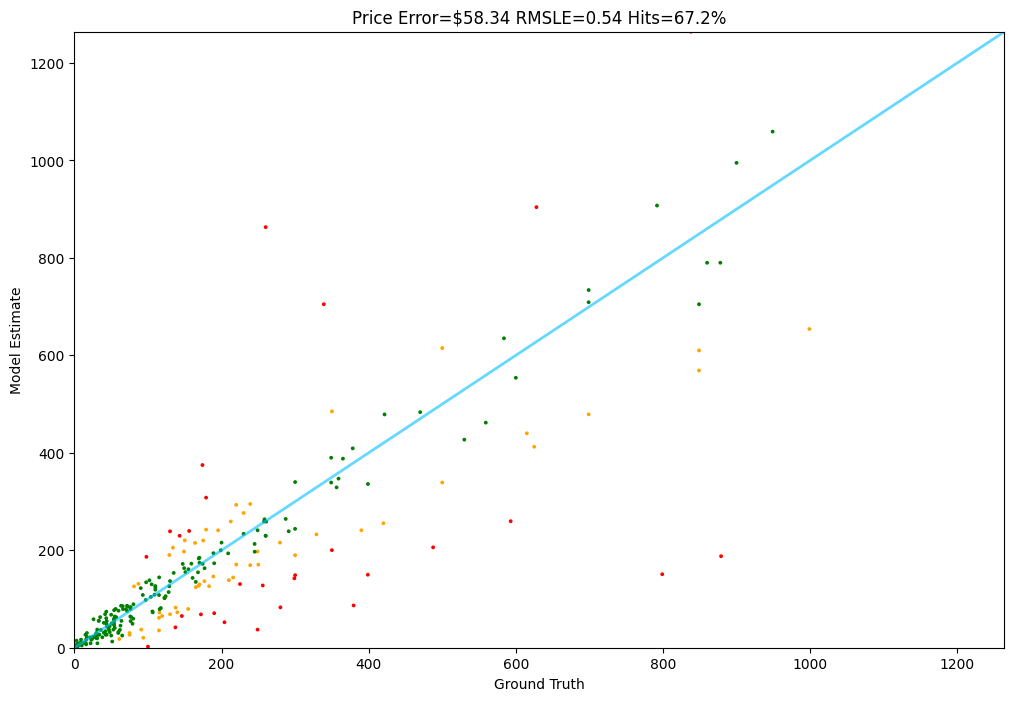

In [9]:
Tester.test(ensemble_agent.price, test[:250])